### Экотоксичность

-----


Задачи:

1. Сделать JOIN (Inner) между данными спектра и токсичности по SMILES

2. Выбрать только один вид (трофический уровенья для обучения - INVERT)

3. Построить распред - kdeplot для ec50

4. Запустить Random Forest на этих сырых данных

5. Подумать как сделать стратифакацию при обучение (проблема - мало токсичных в данных)

Второй этап

6. Сделать признаки из спектра ИК - взять пакеты для генерауии признаков из time-series

7. Запустиь эти данные с 1D-CNN (можно в колабе)


Как сделать smiles из названия -> import cirpy; resp = cirpy.resolve(name, 'smiles')

### 1. Чтение данных

In [8]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../data/envirotox_20230523104542.xlsx')

In [13]:
df['original CAS'].unique()

array([     50000,      50022,      50066, ..., 1161016869, 1197379160,
       1197379182])

In [9]:
mask = df['Trophic Level'] =='INVERT'
df_INVERT = df.loc[mask]

In [11]:
df_INVERT['Chemical name'].nunique()

1710

In [5]:
y = df['Effect value']

In [47]:
df.head()

,CAS,Chemical name,Latin name,Trophic Level,Effect,Effect value,Unit,Test type,Test statistic,Duration,Duration (days),Duration (hours),Effect is 5X above water solubility,Source,version,Reported chemical name,original CAS
0,50000,Formaldehyde;Formaldehyde,Roccus saxatilis,FISH,Mortality/Growth,18.00,mg/L,A,EC50,4 days,4.0,96.0,0,EPAPPID 00028002,EnviroTox.v2,Formaldehyde,50000
1,50000,Formaldehyde;Formaldehyde,Oncorhynchus mykiss,FISH,Mortality/Growth,1.41,mg/L,A,EC50,4 days,4.0,96.0,0,EPAPPID 00101857,EnviroTox.v2,Formaldehyde,50000
2,50000,Formaldehyde;Formaldehyde,Lepomis macrochirus,FISH,Mortality/Growth,1.51,mg/L,A,EC50,4 days,4.0,96.0,0,EPAPPID 00101857,EnviroTox.v2,Formaldehyde,50000
3,50000,Formaldehyde;Formaldehyde,Lepomis macrochirus,FISH,Mortality/Growth,1.79,mg/L,A,EC50,4 days,4.0,96.0,0,EPAPPID 00101857,EnviroTox.v2,Formaldehyde,50000
4,50000,Formaldehyde;Formaldehyde,Oncorhynchus mykiss,FISH,Mortality/Growth,2.24,mg/L,A,EC50,4 days,4.0,96.0,0,EPAPPID 00101857,EnviroTox.v2,Formaldehyde,50000


## IR - data

In [3]:
fname = '/Users/mikhailgasanov/Yandex.Disk.localized/Code/computed_spectra.csv'

df_ir = pd.read_csv(fname)

In [13]:
ec50 = np.random.normal(loc=2, size=len(df_ir))

In [14]:
df_ir['EC50']= ec50

<Axes: >

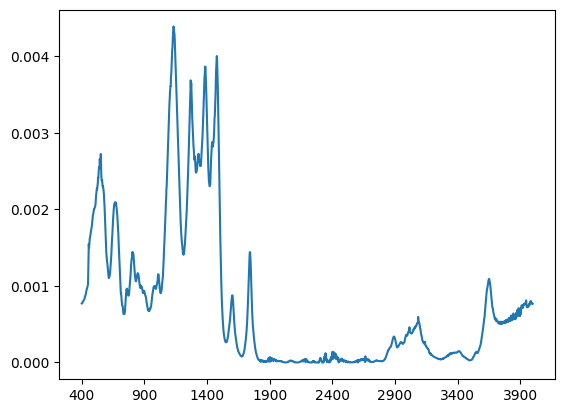

In [18]:
df_ir.iloc[0,1:-1].plot()

In [44]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)
y = ec50[:500]
X = X[:500, :100]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1299256993446727


In [45]:
import seaborn as sns

<Axes: >

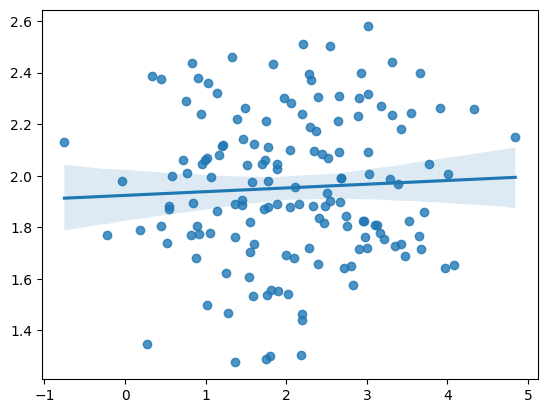

In [46]:
sns.regplot(x=y_test, y=y_pred)

## 1D CNN

In [ ]:

# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100)

# Reshape the data to fit the input requirements of 1D CNN
X = X.reshape(-1, 1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.scatter(X_test[:, 0, 0], y_test, color='black', label='Actual')
plt.scatter(X_test[:, 0, 0], y_pred, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
